In [1]:
from basicpy import BaSiC
from matplotlib import pyplot as plt
import numpy as np
import zarr

In [2]:
path      = '/u/home/f/f7xiesnm/project-zipursky/data/hold/lt172/r1_export.n5'

In [3]:
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
images_s3 = zarr_data[f'/c0/s3'][100:200, :,:]
print(images_s3.shape)

images = zarr_data[f'/c0/s4'][...]
images.shape

(100, 455, 456)


(187, 227, 228)

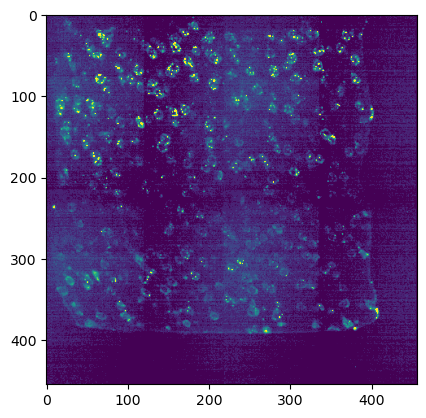

In [4]:
plt.imshow(images_s3[50*2-100], vmin=90, vmax=100)

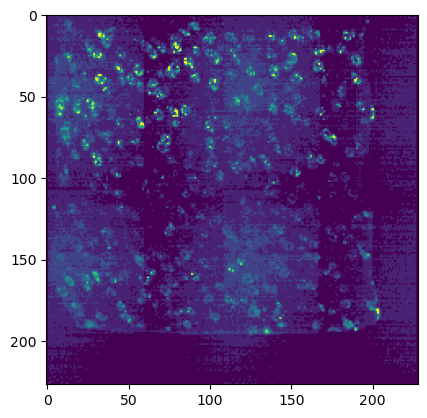

In [5]:
plt.imshow(images[50], vmin=90, vmax=100)

In [6]:
%%time
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)

CPU times: user 29.7 s, sys: 16.3 s, total: 46 s
Wall time: 12 s


In [7]:
%%time
images_transformed = basic.transform(images)

CPU times: user 24.9 ms, sys: 90.9 ms, total: 116 ms
Wall time: 113 ms


In [8]:
%%time
images_transformed2 = (images - basic.darkfield[np.newaxis])/ basic.flatfield[np.newaxis]

CPU times: user 17.3 ms, sys: 49.8 ms, total: 67.1 ms
Wall time: 64.2 ms


In [9]:
from scipy.ndimage import zoom

df_s3 = zoom(basic.darkfield, 2)
ff_s3 = zoom(basic.flatfield, 2)
df_s3 = np.pad(df_s3, ((0,1), (0,0)), constant_values=0)
ff_s3 = np.pad(ff_s3, ((0,1), (0,0)), constant_values=1)
df_s3.shape, ff_s3.shape

((455, 456), (455, 456))

In [10]:
images_trans_s3 = (images_s3 - df_s3[np.newaxis])/ ff_s3[np.newaxis]

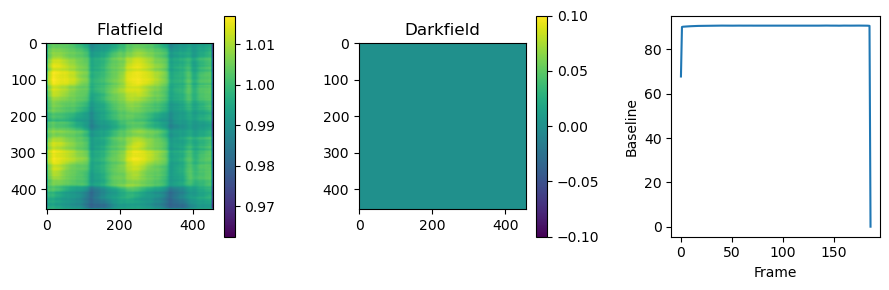

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(ff_s3)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(df_s3)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

In [12]:
np.repeat(basic.darkfield, 2, axis=0).shape

(454, 228)

In [13]:
np.all(images_transformed == images_transformed2)

True

In [14]:
images.shape, images_transformed.shape

((187, 227, 228), (187, 227, 228))

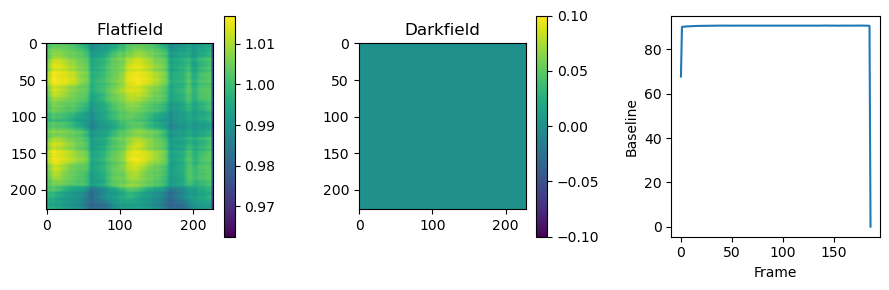

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

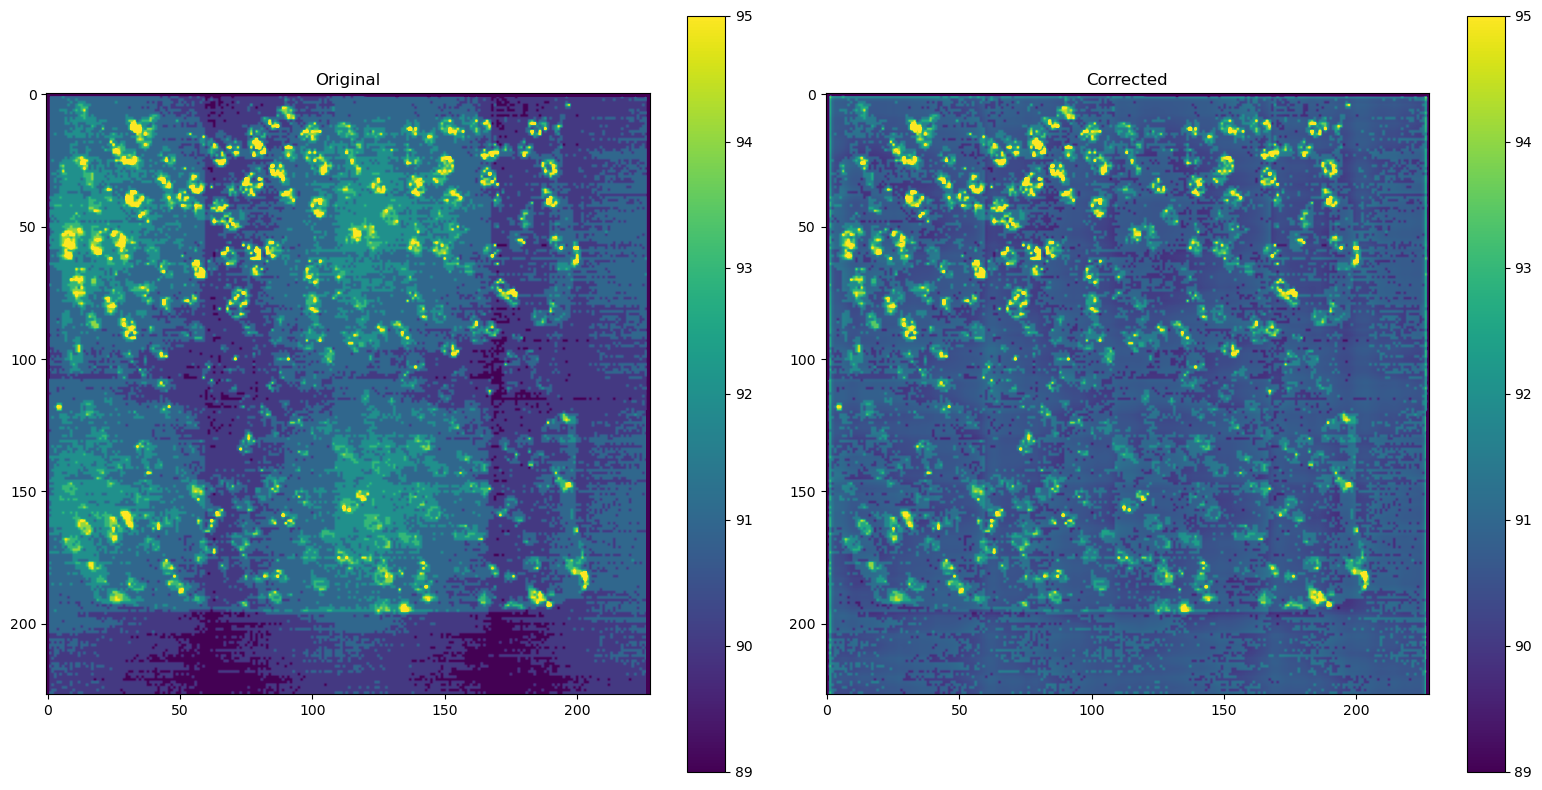

In [16]:
i = 50
vmin = np.percentile(images[i], 5)
vmax = np.percentile(images[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()

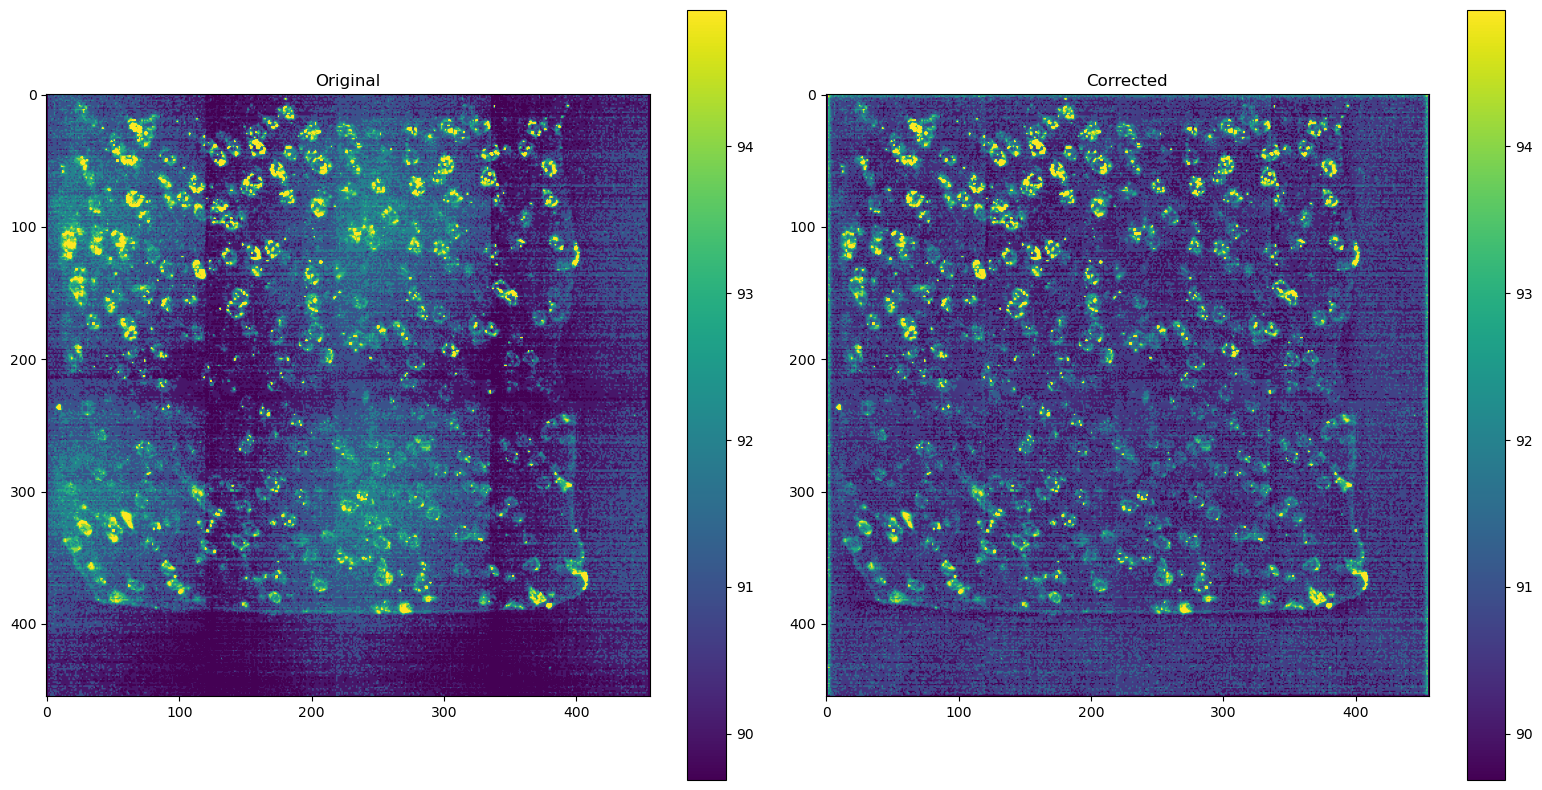

In [17]:
i = 0 
vmin = np.percentile(images_trans_s3[i], 5)
vmax = np.percentile(images_trans_s3[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images_s3[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_trans_s3[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()